In [1]:
#Clive Jake A. Gabotero
#ECE41S1
#COE 005

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('AYALY.csv', parse_dates = ['Date'])
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-12,14.65,14.65,14.65,14.65,14.387809,0
1,2020-10-13,14.65,14.65,14.65,14.65,14.387809,0
2,2020-10-14,14.65,14.65,14.65,14.65,14.387809,0
3,2020-10-15,14.65,14.65,14.65,14.65,14.387809,0
4,2020-10-16,14.65,14.65,14.65,14.65,14.387809,100


In [2]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,15.203081,15.207097,15.202863,15.205765,15.056566,162.624254
std,1.687930,1.687192,1.687903,1.686022,1.641646,1857.287432
min,10.760000,10.760000,10.760000,10.760000,10.699000,0.000000
25%,14.650000,14.650000,14.650000,14.650000,14.462601,0.000000
50%,15.410000,15.410000,15.410000,15.410000,15.193402,0.000000
75%,16.230000,16.230000,16.230000,16.230000,16.001877,0.000000
max,18.480000,18.480000,18.480000,18.480000,18.220251,39600.000000


In [4]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
498,2022-10-04,12.0,12.0,12.0,12.0,12.0,0
499,2022-10-05,12.0,12.0,12.0,12.0,12.0,0
500,2022-10-06,12.0,12.0,12.0,12.0,12.0,0
501,2022-10-07,12.0,12.0,12.0,12.0,12.0,0
502,2022-10-10,12.0,12.0,12.0,12.0,12.0,0


<AxesSubplot:>

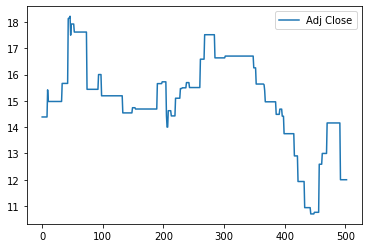

In [5]:
pri = data[['Adj Close']]
pri.plot()

In [6]:
ds = pri.values
ds

array([[14.387809],
       [14.387809],
       [14.387809],
       [14.387809],
       [14.387809],
       [14.387809],
       [14.387809],
       [14.387809],
       [14.387809],
       [15.419017],
       [14.977071],
       [14.977071],
       [14.977071],
       [14.977071],
       [14.977071],
       [14.977071],
       [14.977071],
       [14.977071],
       [14.977071],
       [14.977071],
       [14.977071],
       [14.977071],
       [14.977071],
       [14.977071],
       [14.977071],
       [14.977071],
       [14.977071],
       [14.977071],
       [14.977071],
       [14.977071],
       [14.977071],
       [14.977071],
       [14.977071],
       [15.664542],
       [15.664542],
       [15.664542],
       [15.664542],
       [15.664542],
       [15.664542],
       [15.664542],
       [15.664542],
       [15.664542],
       [15.664542],
       [18.129622],
       [18.149263],
       [18.149263],
       [18.220251],
       [17.500513],
       [17.924469],
       [17.924469],


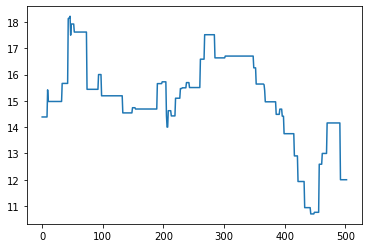

In [7]:
plt.plot(ds)

In [8]:
from sklearn.preprocessing import MinMaxScaler
#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))
len(ds_scaled), len(ds)

(503, 503)

In [9]:
ds_scaled

array([[0.49045152],
       [0.49045152],
       [0.49045152],
       [0.49045152],
       [0.49045152],
       [0.49045152],
       [0.49045152],
       [0.49045152],
       [0.49045152],
       [0.62755744],
       [0.5687978 ],
       [0.5687978 ],
       [0.5687978 ],
       [0.5687978 ],
       [0.5687978 ],
       [0.5687978 ],
       [0.5687978 ],
       [0.5687978 ],
       [0.5687978 ],
       [0.5687978 ],
       [0.5687978 ],
       [0.5687978 ],
       [0.5687978 ],
       [0.5687978 ],
       [0.5687978 ],
       [0.5687978 ],
       [0.5687978 ],
       [0.5687978 ],
       [0.5687978 ],
       [0.5687978 ],
       [0.5687978 ],
       [0.5687978 ],
       [0.5687978 ],
       [0.66020161],
       [0.66020161],
       [0.66020161],
       [0.66020161],
       [0.66020161],
       [0.66020161],
       [0.66020161],
       [0.66020161],
       [0.66020161],
       [0.66020161],
       [0.98795028],
       [0.99056168],
       [0.99056168],
       [1.        ],
       [0.904

In [10]:
#Defining test and train data sizes
train_size = int(len(ds_scaled)*0.80)
test_size = len(ds_scaled) - train_size
train_size,test_size

(402, 101)

In [11]:
#Splitting data between train and test
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]
len(ds_train),len(ds_test)

(402, 101)

In [12]:
len(ds_train),len(ds_test)

(402, 101)

In [13]:
#creating dataset in time series for LSTM model 
#X[100,120,140,160,180] : Y[200]
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [14]:
#Taking 50 days price as one record for training
prevdays = 50
time_stamp = prevdays
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [15]:

X_train.shape,y_train.shape

((351, 50), (351,))

In [16]:
X_test.shape, y_test.shape

((50, 50), (50,))

In [17]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
#Training model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=20)

Epoch 1/100
18/18 [==============================] - 17s 281ms/step - loss: 0.1025 - val_loss: 0.0226
Epoch 2/100
18/18 [==============================] - 1s 76ms/step - loss: 0.0113 - val_loss: 0.0233
Epoch 3/100
18/18 [==============================] - 2s 88ms/step - loss: 0.0085 - val_loss: 0.0262
Epoch 4/100
18/18 [==============================] - 1s 75ms/step - loss: 0.0071 - val_loss: 0.0267
Epoch 5/100
18/18 [==============================] - 1s 76ms/step - loss: 0.0064 - val_loss: 0.0235
Epoch 6/100
18/18 [==============================] - 1s 76ms/step - loss: 0.0062 - val_loss: 0.0241
Epoch 7/100
18/18 [==============================] - 2s 90ms/step - loss: 0.0057 - val_loss: 0.0235
Epoch 8/100
18/18 [==============================] - 1s 75ms/step - loss: 0.0050 - val_loss: 0.0207
Epoch 9/100
18/18 [==============================] - 1s 74ms/step - loss: 0.0050 - val_loss: 0.0224
Epoch 10/100
18/18 [==============================] - 1s 75ms/step - loss: 0.0047 - val_loss: 0.02

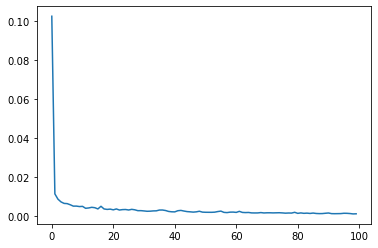

In [20]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

In [21]:
#Predicitng on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

2/2 [==============================] - 0s 26ms/step


In [22]:
#Inverse transform to get actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

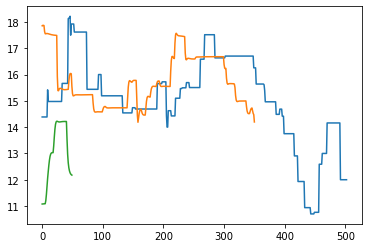

In [23]:
#Comparing using visuals
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [24]:
type(train_predict)

numpy.ndarray

In [25]:
test = np.vstack((train_predict,test_predict))

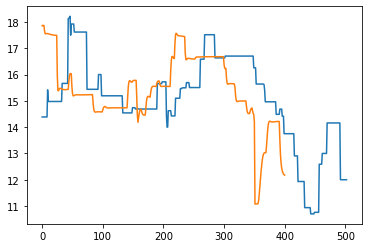

In [26]:
#Combining the predited data to create uniform data visualization
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [27]:
len(ds_test)

101

In [28]:
#Getting the last 50 days records
fut_inp = ds_test[len(ds_test)-prevdays:]

In [29]:
fut_inp = fut_inp.reshape(1,-1)
tmp_inp = list(fut_inp)
fut_inp.shape

(1, 50)

In [30]:
#Creating list of the last 50 data
tmp_inp = tmp_inp[0].tolist()

In [31]:
#Predicting next 8 days price using the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=prevdays
i=0
while(i<8):
    
    if(len(tmp_inp)>prevdays):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.1943061798810959], [0.19652827084064484], [0.2003987729549408], [0.20492297410964966], [0.2095644772052765], [0.21410320699214935], [0.2184516191482544], [0.22260013222694397]]


In [32]:
len(ds_scaled)

503

In [33]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,prevdays+1)
plot_pred=np.arange(prevdays+1,prevdays+8+1)

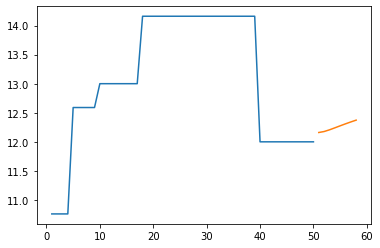

In [34]:
plt.plot(plot_new, normalizer.inverse_transform(ds_scaled[len(ds_scaled)-prevdays:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [35]:
ds_new = ds_scaled.tolist()

In [36]:
len(ds_new)

503

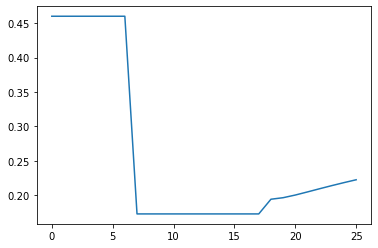

In [37]:
#Entends helps us to fill the missing value with approx value
ds_new.extend(lst_output)
plt.plot(ds_new[485:])

In [38]:
#Creating final data for plotting
final_graph = normalizer.inverse_transform(ds_new).tolist()

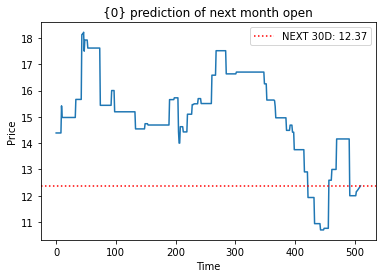

In [39]:
#Plotting final results with predicted value after 8 Days
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month open")
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()

In [40]:
next_data = normalizer.inverse_transform(lst_output)

In [41]:
next_data

array([[12.16042555],
       [12.17713845],
       [12.20624947],
       [12.24027712],
       [12.27518703],
       [12.30932396],
       [12.34202946],
       [12.37323147]])

In [42]:
new_data = next_data.tolist()

In [43]:
from datetime import datetime, timedelta
next_7_days = [
    datetime(2022, 10, 12),
    datetime(2022, 10, 13),
    datetime(2022, 10, 14),
    datetime(2022, 10, 15),
    datetime(2022, 10, 16),
    datetime(2022, 10, 17),
    datetime(2022, 10, 18),
    datetime(2022, 10, 19),
]
next_7_days

[datetime.datetime(2022, 10, 12, 0, 0),
 datetime.datetime(2022, 10, 13, 0, 0),
 datetime.datetime(2022, 10, 14, 0, 0),
 datetime.datetime(2022, 10, 15, 0, 0),
 datetime.datetime(2022, 10, 16, 0, 0),
 datetime.datetime(2022, 10, 17, 0, 0),
 datetime.datetime(2022, 10, 18, 0, 0),
 datetime.datetime(2022, 10, 19, 0, 0)]

In [44]:
new_data

[[12.160425549736873],
 [12.177138453588471],
 [12.206249471486121],
 [12.240277123945177],
 [12.275187033744663],
 [12.309323959692911],
 [12.342029458970428],
 [12.373231467112035]]

In [45]:
pd.DataFrame(next_7_days, columns = ['Date']).to_csv('Gabotero_AC_forecast.csv')

In [46]:
data4 = pd.read_csv('Gabotero_AC_forecast.csv')
data4["Adj Close Value in the next 8 days"] = new_data
data4 = data4.drop(['Unnamed: 0'], axis=1)
data4.to_csv('Gabotero_AC_forecast.csv')